In [8]:
pip install folium geopandas


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import folium
import geopandas as gpd

In [10]:
import folium
import geopandas as gpd

# Path to your downloaded JSON file
geojson_path = "../Map/geojson.json"

# Load the JSON data as GeoJSON
geo_data = gpd.read_file(geojson_path)

# Center coordinates for NYC
nyc_center = [40.7128, -74.0060]

# Create the folium map
nyc_map = folium.Map(location=nyc_center, zoom_start=11)

# Add GeoJSON layer
folium.GeoJson(
    geo_data,
    name="Community Districts"
).add_to(nyc_map)

# Display the map
nyc_map


In [11]:
import folium
import geopandas as gpd

# Path to the GeoJSON file
geojson_path = "../Map/geojson.json"

# Load the GeoJSON data
geo_data = gpd.read_file(geojson_path)

# Create a folium map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Define a style function to highlight BoroCD 304
def style_function(feature):
    if feature["properties"]["BoroCD"] == 304:  # Match the neighborhood code
        return {"fillColor": "red", "color": "red", "weight": 2, "fillOpacity": 0.7}
    else:
        return {"fillColor": "gray", "color": "black", "weight": 0.5, "fillOpacity": 0.1}

# Add the GeoJSON layer with styling
folium.GeoJson(
    geo_data,
    name="Community Districts",
    style_function=style_function
).add_to(nyc_map)

nyc_map


Now doing things without the geojson

In [12]:
ppb_only = pd.read_csv("../Data/Air_Quality.csv")
ppb_only = ppb_only.query("`Measure Info` == 'ppb'")

In [24]:
ppb_only.to_csv('../Data/ppb_only_unclean.csv', index=False)


In [13]:
ppb_only

Unique ID  Indicator ID                    Name Measure Measure Info  \
0         172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1         172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2         336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3         336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4         172582           375  Nitrogen dioxide (NO2)    Mean          ppb   
...          ...           ...                     ...     ...          ...   
16207     179272           375  Nitrogen dioxide (NO2)    Mean          ppb   
16208     602701           375  Nitrogen dioxide (NO2)    Mean          ppb   
16209     221842           386              Ozone (O3)    Mean          ppb   
16210     171567           375  Nitrogen dioxide (NO2)    Mean          ppb   
16211     211560           375  Nitrogen dioxide (NO2)    Mean          ppb   

      Geo Type Name  Geo Join ID                      Geo Place Name  \
0             UHF34          203  Bedford Stuyvesant - Crown Heights   
1             UHF34          203  Bedford Stuyvesant - Crown Heights   
2             UHF34          204                       East New York   
3             UHF34          103                  Fordham - Bronx Pk   
4             UHF34          104                Pelham - Throgs Neck   
...             ...          ...                                 ...   
16207       Borough            5                       Staten Island   
16208       Borough            5                       Staten Island   
16209         UHF34          205                         Sunset Park   
16210         UHF34          205                         Sunset Park   
16211         UHF34          205                         Sunset Park   

               Time Period  Start_Date  Data Value  Message  
0      Annual Average 2011  12/01/2010       25.30      NaN  
1      Annual Average 2009  12/01/2008       26.93      NaN  
2      Annual Average 2015  01/01/2015       19.09      NaN  
3      Annual Average 2015  01/01/2015       19.76      NaN  
4      Annual Average 2009  12/01/2008       22.83      NaN  
...                    ...         ...         ...      ...  
16207       Winter 2008-09  12/01/2008       21.63      NaN  
16208       Winter 2017-18  12/01/2017       18.92      NaN  
16209          Summer 2014  06/01/2014       30.60      NaN  
16210       Winter 2008-09  12/01/2008       30.17      NaN  
16211       Winter 2013-14  12/01/2013       27.68      NaN  

[7473 rows x 12 columns]

In [14]:
max_pollutant = ppb_only.idxmax()
max_pollutant

/var/folders/w6/mvc4pv_n6rsbn1xycgk7rqf40000gn/T/ipykernel_82236/264463214.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_pollutant = ppb_only.idxmax()


Unique ID         11530.0
Indicator ID        576.0
Name                576.0
Measure               0.0
Measure Info          0.0
Geo Type Name         8.0
Geo Join ID         207.0
Geo Place Name       25.0
Time Period         757.0
Start_Date          584.0
Data Value        15161.0
Message               NaN
dtype: float64

In [15]:
print("Neighborhood:", max_pollutant['Geo Place Name'])
print(max_pollutant)


Neighborhood: 25.0
Unique ID         11530.0
Indicator ID        576.0
Name                576.0
Measure               0.0
Measure Info          0.0
Geo Type Name         8.0
Geo Join ID         207.0
Geo Place Name       25.0
Time Period         757.0
Start_Date          584.0
Data Value        15161.0
Message               NaN
dtype: float64


In [16]:
ppb_only['Geo Place Name'] = ppb_only['Geo Place Name'].astype(str)


In [17]:
print("Neighborhood:", max_pollutant['Geo Place Name'])
print(max_pollutant)

Neighborhood: 25.0
Unique ID         11530.0
Indicator ID        576.0
Name                576.0
Measure               0.0
Measure Info          0.0
Geo Type Name         8.0
Geo Join ID         207.0
Geo Place Name       25.0
Time Period         757.0
Start_Date          584.0
Data Value        15161.0
Message               NaN
dtype: float64


In [18]:
print(ppb_only['Geo Place Name'].unique())


['Bedford Stuyvesant - Crown Heights' 'East New York' 'Fordham - Bronx Pk'
 'Pelham - Throgs Neck' 'Chelsea-Village' 'Borough Park'
 'High Bridge - Morrisania' 'Bensonhurst - Bay Ridge'
 'Coney Island - Sheepshead Bay' 'Rockaways'
 'Mott Haven and Melrose (CD1)' 'Financial District (CD1)'
 'Greenwich Village and Soho (CD2)' 'Woodside and Sunnyside (CD2)'
 'Greenpoint' 'Kingsbridge - Riverdale' 'Northeast Bronx' 'West Queens'
 'Washington Heights' 'Hunts Point - Mott Haven'
 'East Flatbush - Flatbush' 'Canarsie - Flatlands' 'Southwest Queens'
 'Morrisania and Crotona (CD3)' 'Lower East Side and Chinatown (CD3)'
 'Central Harlem - Morningside Heights' 'Downtown - Heights - Slope'
 'Bronx' 'Williamsburg - Bushwick' 'Northern SI' 'Port Richmond'
 'Upper East Side (CD8)' 'Central Harlem (CD10)'
 'Washington Heights and Inwood (CD12)'
 'Bay Ridge and Dyker Heights (CD10)' 'Borough Park (CD12)'
 'Flushing - Clearview' 'Lower Manhattan' 'Southeast Queens' 'East Harlem'
 'Upper West Side' 'Uppe

In [19]:
max_neighborhood = ppb_only.groupby('Geo Place Name')['Data Value'].agg(max)
max_neighborhood

/var/folders/w6/mvc4pv_n6rsbn1xycgk7rqf40000gn/T/ipykernel_82236/2910707401.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_neighborhood = ppb_only.groupby('Geo Place Name')['Data Value'].agg(max)


Geo Place Name
Bay Ridge and Dyker Heights (CD10)      33.51
Bayside - Little Neck                   33.84
Bayside Little Neck-Fresh Meadows       33.66
Bayside and Little Neck (CD11)          33.89
Bedford Stuyvesant (CD3)                33.11
                                        ...  
West Queens                             33.58
Williamsbridge and Baychester (CD12)    35.02
Williamsburg - Bushwick                 32.99
Willowbrook                             34.68
Woodside and Sunnyside (CD2)            33.81
Name: Data Value, Length: 114, dtype: float64

In [20]:
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt


In [22]:
ppb_only

Unique ID  Indicator ID                    Name Measure Measure Info  \
0         172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1         172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2         336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3         336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4         172582           375  Nitrogen dioxide (NO2)    Mean          ppb   
...          ...           ...                     ...     ...          ...   
16207     179272           375  Nitrogen dioxide (NO2)    Mean          ppb   
16208     602701           375  Nitrogen dioxide (NO2)    Mean          ppb   
16209     221842           386              Ozone (O3)    Mean          ppb   
16210     171567           375  Nitrogen dioxide (NO2)    Mean          ppb   
16211     211560           375  Nitrogen dioxide (NO2)    Mean          ppb   

      Geo Type Name  Geo Join ID                      Geo Place Name  \
0             UHF34          203  Bedford Stuyvesant - Crown Heights   
1             UHF34          203  Bedford Stuyvesant - Crown Heights   
2             UHF34          204                       East New York   
3             UHF34          103                  Fordham - Bronx Pk   
4             UHF34          104                Pelham - Throgs Neck   
...             ...          ...                                 ...   
16207       Borough            5                       Staten Island   
16208       Borough            5                       Staten Island   
16209         UHF34          205                         Sunset Park   
16210         UHF34          205                         Sunset Park   
16211         UHF34          205                         Sunset Park   

               Time Period  Start_Date  Data Value  Message  
0      Annual Average 2011  12/01/2010       25.30      NaN  
1      Annual Average 2009  12/01/2008       26.93      NaN  
2      Annual Average 2015  01/01/2015       19.09      NaN  
3      Annual Average 2015  01/01/2015       19.76      NaN  
4      Annual Average 2009  12/01/2008       22.83      NaN  
...                    ...         ...         ...      ...  
16207       Winter 2008-09  12/01/2008       21.63      NaN  
16208       Winter 2017-18  12/01/2017       18.92      NaN  
16209          Summer 2014  06/01/2014       30.60      NaN  
16210       Winter 2008-09  12/01/2008       30.17      NaN  
16211       Winter 2013-14  12/01/2013       27.68      NaN  

[7473 rows x 12 columns]

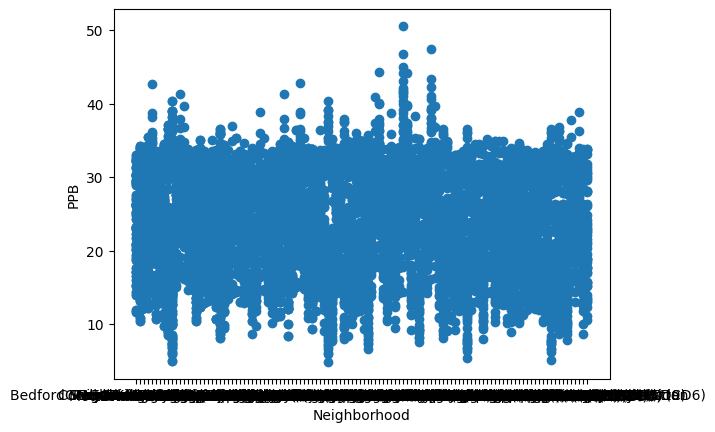

In [23]:
import matplotlib.pyplot as plt

plt.scatter(data=ppb_only,x="Geo Place Name",y="Data Value")
plt.xlabel("Neighborhood")
plt.ylabel("PPB")


# Show the plot
plt.show()


In [25]:
# filtering data to only be in manhattan
def filter_manhattan_neighborhoods(dataframe):
    manhattan_neighborhoods = [
        'Chelsea-Village',
        'Financial District (CD1)',
        'Greenwich Village and Soho (CD2)',
        'Washington Heights',
        'Lower East Side and Chinatown (CD3)',
        'Central Harlem - Morningside Heights',
        'Upper East Side (CD8)',
        'Central Harlem (CD10)',
        'Washington Heights and Inwood (CD12)',
        'East Harlem',
        'Upper West Side',
        'Upper East Side-Gramercy',
        'Clinton and Chelsea (CD4)',
        'Stuyvesant Town and Turtle Bay (CD6)',
        'Lower Manhattan'
    ]
    
    filtered_dataframe = dataframe[dataframe['Geo Place Name'].isin(manhattan_neighborhoods)]
    
    return filtered_dataframe


In [26]:
manhattan_ppb_only = filter_manhattan_neighborhoods(ppb_only)

In [27]:
manhattan_ppb_only

Unique ID  Indicator ID                    Name Measure Measure Info  \
6         172607           375  Nitrogen dioxide (NO2)    Mean          ppb   
7         172675           375  Nitrogen dioxide (NO2)    Mean          ppb   
20        336723           375  Nitrogen dioxide (NO2)    Mean          ppb   
21        741126           375  Nitrogen dioxide (NO2)    Mean          ppb   
22        165858           375  Nitrogen dioxide (NO2)    Mean          ppb   
...          ...           ...                     ...     ...          ...   
15840     743705           386              Ozone (O3)    Mean          ppb   
15859     549348           386              Ozone (O3)    Mean          ppb   
15860     605251           386              Ozone (O3)    Mean          ppb   
15888     212311           375  Nitrogen dioxide (NO2)    Mean          ppb   
15889     602767           375  Nitrogen dioxide (NO2)    Mean          ppb   

      Geo Type Name  Geo Join ID                    Geo Place Name  \
6             UHF34       306308                   Chelsea-Village   
7             UHF34       306308                   Chelsea-Village   
20               CD          101          Financial District (CD1)   
21               CD          101          Financial District (CD1)   
22               CD          102  Greenwich Village and Soho (CD2)   
...             ...          ...                               ...   
15840         UHF42          304                   Upper West Side   
15859         UHF42          304                   Upper West Side   
15860         UHF42          304                   Upper West Side   
15888         UHF42          304                   Upper West Side   
15889         UHF42          304                   Upper West Side   

               Time Period  Start_Date  Data Value  Message  
6      Annual Average 2009  12/01/2008       38.16      NaN  
7      Annual Average 2011  12/01/2010       34.96      NaN  
20          Winter 2014-15  12/01/2014       30.40      NaN  
21     Annual Average 2021  01/01/2021       21.61      NaN  
22          Winter 2010-11  12/01/2010       36.79      NaN  
...                    ...         ...         ...      ...  
15840          Summer 2021  06/01/2021       27.81      NaN  
15859          Summer 2017  06/01/2017       25.57      NaN  
15860          Summer 2018  06/01/2018       27.20      NaN  
15888       Winter 2013-14  12/01/2013       30.99      NaN  
15889       Winter 2017-18  12/01/2017       27.31      NaN  

[1007 rows x 12 columns]

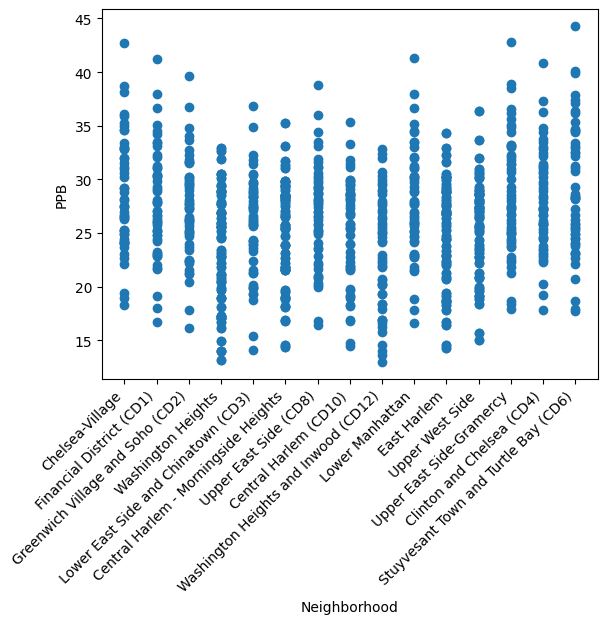

In [29]:
plt.scatter(data=manhattan_ppb_only,x="Geo Place Name",y="Data Value")
plt.xlabel("Neighborhood")
plt.ylabel("PPB")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align them to the right


# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

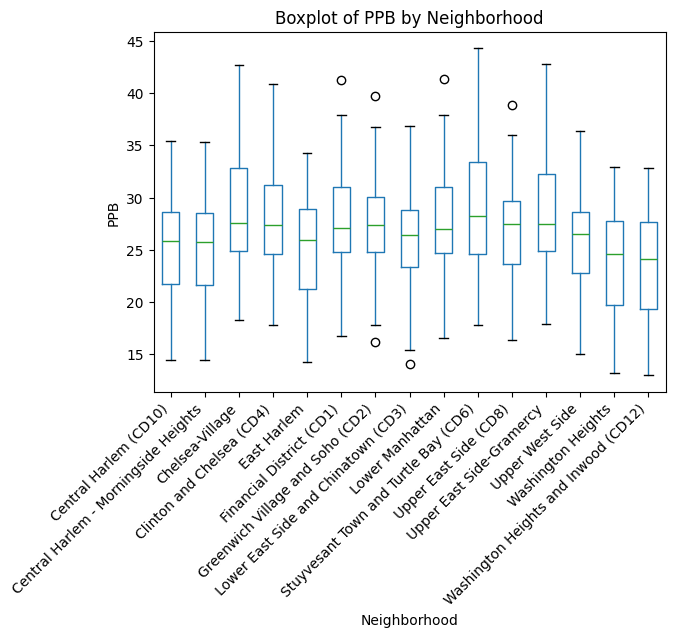

In [30]:

# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
manhattan_ppb_only.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Boxplot of PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [31]:
manhattan_ppb_only.to_csv('../Data/manhattan_ppb_only_unclean.csv', index=False)


In [36]:
%pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/e5/ae/580600f441f6fc05218bd6c9d5794f4aef072a7d9093b291f1c50a9db8bc/plotly-5.24.1-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/b6/cb/b86984bed139586d01532a587464b5805f12e397594f19f931c4c2fbfa61/tenacity-9.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 6.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np
import plotly.graph_objects as go

/var/folders/w6/mvc4pv_n6rsbn1xycgk7rqf40000gn/T/ipykernel_82236/1000843553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Time Period'].str.extract(r'(\d{4})').astype(int)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [44]:
%pip install nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema>=2.15 from https://files.pythonhosted.org/packages/6d/ca/086311cdfc017ec964b2436fe0c98c1f4efcb7e4c328956a22456e497655/fastjsonschema-2.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/69/4a/4f9dbeb84e8850557c02365a0eee0649abe5eb1d84af92a25731c6c0f922/jsonschema-4.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/6a/21/5b6702a7f963e95456c0de2d495f67bf5fd62840ac655dc451586d23d39a/attrs-24.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/d1/0f/8910b19ac0670a0f80ce1008e5e751c4a57e

**Code for 3d graph**

In [46]:

# Create a copy of the original data to avoid warnings
data = manhattan_ppb_only.copy()

data['Time Period'] = data['Time Period'].str.extract(r'(\d{4})').astype(float)

# Group data by year (from "Time Period") and neighborhood and calculate the mean concentration
grouped_data = filtered_data.groupby(['Time Period', 'Geo Place Name'])['Data Value'].mean().reset_index()

# Ensure valid data for plotting
if grouped_data.empty:
    raise ValueError("Filtered data is empty. Please check your filtering criteria.")

# Create a pivot-like structure for the 3D surface
years = sorted(grouped_data['Time Period'].unique())
neighborhoods = sorted(grouped_data['Geo Place Name'].unique())
z_values = []

for year in years:
    row = []
    for neighborhood in neighborhoods:
        # Fetch the mean value or 0 if not available
        value = grouped_data[
            (grouped_data['Time Period'] == year) &
            (grouped_data['Geo Place Name'] == neighborhood)
        ]['Data Value'].mean()
        row.append(value if not np.isnan(value) else 0)  # Replace NaN with 0
    z_values.append(row)

z_values = np.array(z_values)

# Create the 3D surface plot
surface = go.Surface(
    z=z_values,
    x=neighborhoods,  # Neighborhoods on the X-axis
    y=years,  # Years on the Y-axis
    colorscale='Viridis',
    colorbar=dict(title='PPB Concentration')
)

fig = go.Figure(data=[surface])

# Customize the layout
fig.update_layout(scene=dict(
    xaxis_title="Neighborhood",
    yaxis_title="Year",
    zaxis_title="PPB Concentration"
))

# Show the interactive plot
#fig.show()
fig.write_html("3d_surface_plot.html")


In [50]:
# Normalize the "Time Period" column
def extract_year(time_period):
    import re
    if isinstance(time_period, str):  # Ensure the value is a string before regex
        match = re.search(r'\d{4}', time_period)
        return int(match.group()) if match else None
    return None  # Return None if not a string

# Apply the normalization
data['Normalized Year'] = data['Time Period'].apply(extract_year)

# Remove rows where year couldn't be extracted
data = data.dropna(subset=['Normalized Year'])

# Sort by the normalized year
data = data.sort_values(by='Normalized Year')

# Group data again after sorting
grouped_data = data.groupby(['Normalized Year', 'Geo Place Name'])['Data Value'].mean().reset_index()

# Generate new sorted axis data
years = sorted(grouped_data['Normalized Year'].unique())
neighborhoods = sorted(grouped_data['Geo Place Name'].unique())
z_values = []

for year in years:
    row = []
    for neighborhood in neighborhoods:
        # Fetch the mean value or 0 if not available
        value = grouped_data[
            (grouped_data['Normalized Year'] == year) &
            (grouped_data['Geo Place Name'] == neighborhood)
        ]['Data Value'].mean()
        row.append(value if not np.isnan(value) else 0)  # Replace NaN with 0
    z_values.append(row)

z_values = np.array(z_values)

# Create the 3D surface plot with sorted years
surface = go.Surface(
    z=z_values,
    x=neighborhoods,  # Neighborhoods on the X-axis
    y=years,  # Sorted years on the Y-axis
    colorscale='Viridis',
    colorbar=dict(title='PPB Concentration')
)

fig = go.Figure(data=[surface])

# Customize the layout
fig.update_layout(scene=dict(
    xaxis_title="Neighborhood",
    yaxis_title="Year",
    zaxis_title="PPB Concentration"
))

# Show the interactive plot
fig.write_html("3d_sorted_dates.html")
